# Inara Tareque
## Lab 1

### Run a multiple multinomial logistic regression. The outcome can be truly unordered or simply ordinal. Tell me how you think your independent variables will be related to your dependent variable. Interpret your results. Compare coefficients on your X variable of interest (not all of them) across different cuts of the multinomial outcomes, as we did in class (i.e., the Z test). For extra credit, generate some predicted probabilities. Tell me what you learned about your hypothesized relationship(s) from this exercise.

In [58]:
# Import modules
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import MNLogit


## Data: 2006 General Social Survey (GSS)
## Codebook: http://www.thearda.com/Archive/Files/Codebooks/GSS2006_CB.asp

## Data and hypothesis:
### I wanted to investigate factors that are associated with the political leanings of people. To do so, I used respondents' data from the question: "Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what? (PARTYID)". I grouped respondents' answers into 3 groups below -- **democrat**, **independent**, **republican**.

### I primarily wanted to investigate the **relationship between people's income and political preference**. While I do not have a strong prediction in terms of whether income would be associated with people's political preference, given that republicans often vouch for tax breaks for corporations, I am inclined towards hypothesizing that people with higher income are more likely republicans than democrats. Based on the same logic, I would also hypothesize that people with higher income are more likely independents compared to democrats.

### Additional variables that may also impact people's values and thereby political preference include gender, age, and location. As such, I control for these in my model.

In [4]:
# Import and read data
data = pd.read_csv("GSS.2006.csv")
data.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Before I run a logistic regression below, I clean the data as shown below.

In [103]:
# Recoding "partyid"
data = data[data['partyid'] < 7]

conditions = [
    data["partyid"] == 0,
    data["partyid"] == 1,
    data["partyid"] == 2,
    data["partyid"] == 3,
    data["partyid"] == 4,
    data["partyid"] == 5,
    data["partyid"] == 6,
]

categories = ["democrat", "democrat", "independent", "independent", "independent", "republican", "republican"]

data['partyid_cat'] = np.select(conditions, categories)
data['partyid_cat'] = data['partyid_cat'].astype('category')

# Distribution of respondents' marital state
data[['partyid', "partyid_cat"]].value_counts()

partyid  partyid_cat
3.0      independent    997
1.0      democrat       735
0.0      democrat       699
5.0      republican     637
2.0      independent    527
6.0      republican     493
4.0      independent    327
dtype: int64

## Distribution of my independent variable:

In [92]:
#create a numeric party_cat variable
conditions = [
    data["partyid_cat"] == "democrat",
    data["partyid_cat"] == "independent",
    data["partyid_cat"] == "republican"
]

categories = [1,2,3]

data['partyid_cat_num'] = np.select(conditions, categories)
data[['partyid_cat', "partyid_cat_num"]].value_counts()


partyid_cat  partyid_cat_num
independent  2                  1851
democrat     1                  1434
republican   3                  1130
dtype: int64

In [93]:
# Create new variables
data["income_10k"] = data["realinc"]/10000

#Gender - Female
conditions = [
    (data['sex'] == 1) ,
    (data['sex'] == 2 )]
choices = [0, 1]
data['female'] = np.select(conditions, choices, default=np.nan)


## Logistic Regression -- why is it appropriate here?

### My dependent variable, political preference of participants, is unordered and polytomous with several states -- democrat, republican, independent, as shown by its distribution above. Therefore, a multinomial logistic regression is appropriate for this model.

In [101]:

ml1 = MNLogit.from_formula('partyid_cat_num ~  + income_10k + female + age + region', data=data).fit()
ml1.summary()

Optimization terminated successfully.
         Current function value: 1.056495
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:        partyid_cat_num   No. Observations:                 3794
Model:                        MNLogit   Df Residuals:                     3784
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.02410
Time:                        18:59:18   Log-Likelihood:                -4008.3
converged:                       True   LL-Null:                       -4107.3
Covariance Type:            nonrobust   LLR p-value:                 1.738e-38
=====================================================================================
partyid_cat_num=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2323      0.157      7.834      0.000       0.924       1.541
income_10k           -0.0208      0.013     -1.556      0.120      -0.047       0.005
female               -0.3916      0.078     -5.017      0.000      -0.545      -0.239
age                  -0.0162      0.002     -7.010      0.000      -0.021      -0.012
region                0.0010      0.016      0.062      0.950      -0.030       0.032
-------------------------------------------------------------------------------------
partyid_cat_num=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5544      0.180     -3.086      0.002      -0.907      -0.202
income_10k            0.0904      0.013      7.171      0.000       0.066       0.115
female               -0.3472      0.087     -3.982      0.000      -0.518      -0.176
age                   0.0012      0.003      0.468      0.640      -0.004       0.006
region                0.0237      0.018      1.350      0.177      -0.011       0.058
=====================================================================================
"""

## Interpreting the results:

### For each 10,000 dollar increase in family income, on average, the logit of being an independent compared to being a democrat decreases by 0.021***, net respondents' gender, age, and location (region). On the other hand, for each 10,000 dollar increase in family income, on average, the logit of being a republican compared to being a democrat increases by 0.09***, net respondents' gender, age, and location (region). Both of these coefficients are statistically significant at p < 0.001, meaning that we can reject the null hypothesis of people's income having to association with their political preference.

### The positive relationship between income and people being more likely to be republican than democrats supports my expectations. Interestingly however, people with higher income being less likely to be independent than democrats is not what I had predicted. This could perhaps be because independent voters may care more about issues that are negatively correlated with income compared to democrats.



## Compare coefficients on your X variable of interest (not all of them) across different cuts of the multinomial outcomes, as we did in class (i.e., the Z test).

## To do so, I test the equality of the slopes across equations using a Chi-sq test.

### As shown below, -0.021 =/=  0.090, based on the Chi-sq test, where p < 0.001. So I can conclude that the coefficient of income across different cuts of my multinomial outcomes, i.e. for "indendent" and "republican" respondents are statistically significantly different.

In [104]:
## Z score - create a function
def get_chi2(b1, b2, se1, se2):
    z = np.square(b1-b2) / (np.square(se1) + np.square(se2))
    chi2 = sp.stats.chi2.pdf(z, 1)
    print(z)
    print(chi2)

get_chi2(-0.021, 0.090, 0.013, 0.013)

36.452662721893496
8.025097209035836e-10


## Extra Credit:
## For extra credit, generate some predicted probabilities. Tell me what you learned about your hypothesized relationship(s) from this exercise.

### I generate predicted probabilities below. I will focus on income_10k for my analysis as that is my main independent variable of interest.

### Coefficients:
#### - Independent = -0.021
#### - Democrat = 0 (as it is the reference group of the model)
#### - Republican = 0.09

### Adding 0.021 to all 3 cuts above to generate easy-to-understand predicted probabilities (as with the class example), we have:
#### - Independent = 0
#### - Democrat = 0.021 (as it is the reference group of the model)
#### - Republican = 0.111 (0.021+0.09)

In [109]:
## Generate dataframe of predicted probabilities
data = [["independent", 0], ["democrat", 0.021], ["republican", 0.09]]
plot_data = pd.DataFrame(data, columns = ['pol_view', 'logit'])
plot_data['predicted_prob'] = np.exp(plot_data['logit'])
plot_data

,pol_view,logit,predicted_prob
0,independent,0.000,1.000000
1,democrat,0.021,1.021222
2,republican,0.090,1.094174


Text(0.5, 1.0, 'Logit coefficient on income_10k, from multinomial regression.')

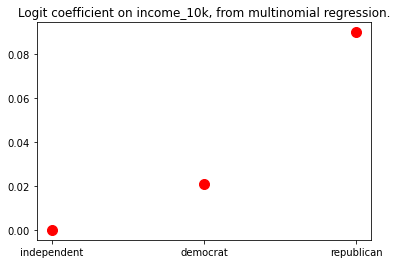

In [118]:
## Visualizing the logit results
plt.scatter(plot_data['pol_view'], plot_data['logit'], color = "red", s = 100)
plt.title("Logit coefficient on income_10k, from multinomial regression.")

Text(0.5, 1.0, 'Predicted probabilities from multinomial regression.')

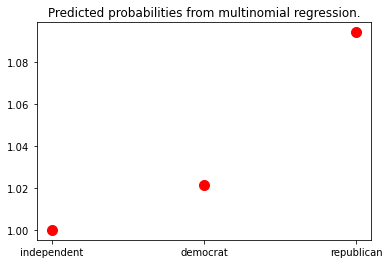

In [119]:
## Visualizing the predicted probability results
plt.scatter(plot_data['pol_view'], plot_data['predicted_prob'], color = "red", s = 100)
plt.title("Predicted probabilities from multinomial regression.")

### As visualized above, the results from my multonomial logit regression suggest that a 10,000 increase in family income is associated with an odds ratio on going from independent to democrat equal to 1.02 (i.e. 2% increase in the odds) whereas it is associated with a much higher increase of 1.09 (i.e. 9% increase in the odds) of going from independent to republican, on average, net of age, gender, and region.

### As discussed earlier, this largely supports my original hypothesis regarding republican voters. However, my hypothesis regarding independent voters is not supported. In future research, it would be interesting to explore additional independent variables that could explain why that's the case.